# Supervised Learning - Foundations Project: ReCell 

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# loading data
data = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking shape of the data
print(
    f"File has {data.shape[0]} device observations and {data.shape[1]} features(variables)"
)

File has 3454 device observations and 15 features(variables)


<IPython.core.display.Javascript object>

In [4]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,4.645640,5.634325
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,4.422809,5.799820
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,4.959412,6.040659
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,4.227855,4.879007


<IPython.core.display.Javascript object>

In [5]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

In [7]:
# checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [8]:
# checking for missing values in the data
print(f"\nNull values in each feature/variable:\n{df.isnull().sum()}")


Null values in each feature/variable:
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


<IPython.core.display.Javascript object>

## Statistical Summary of the Data

In [9]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

## Univariate Analysis

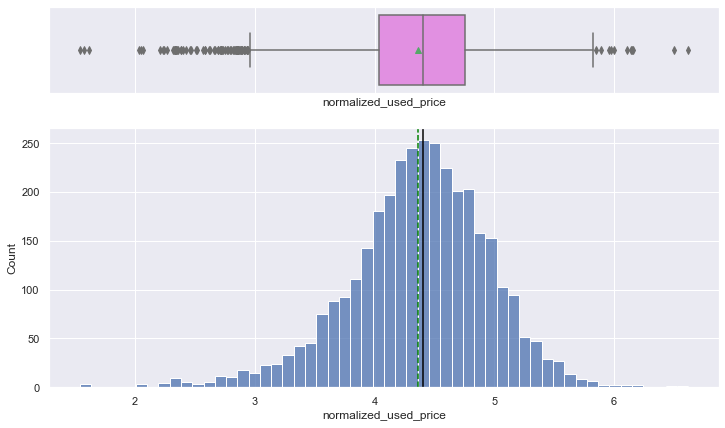

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(df, "normalized_used_price")

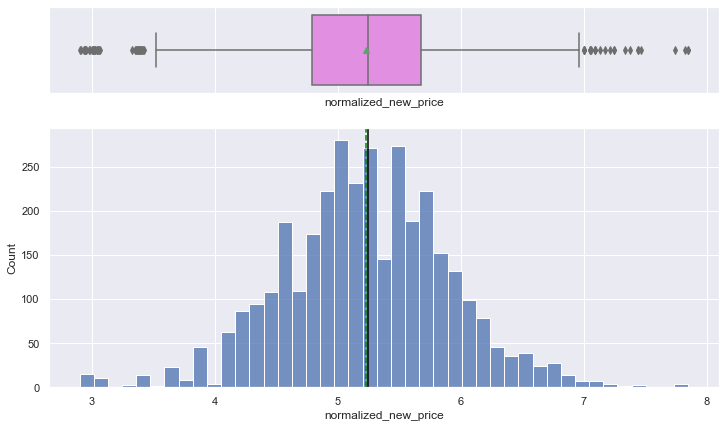

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(df, "normalized_new_price")

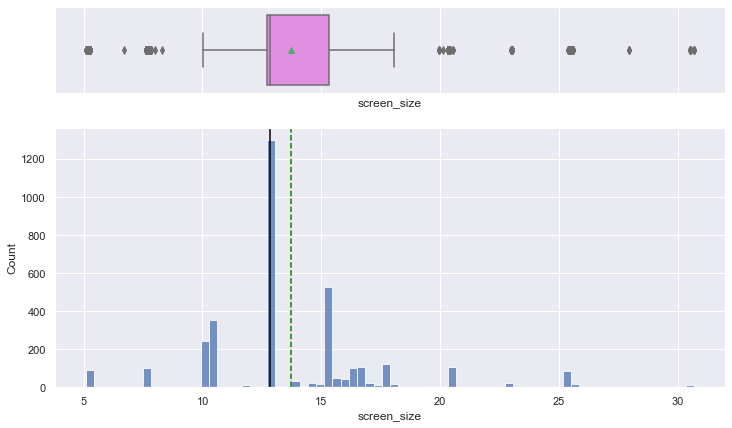

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(df, "screen_size")

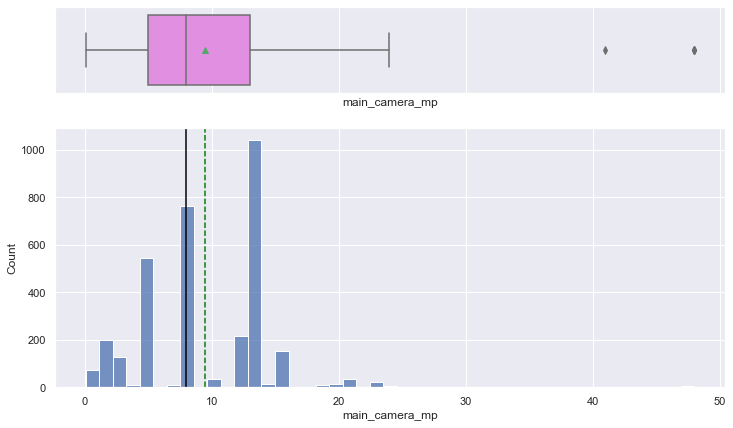

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "main_camera_mp")

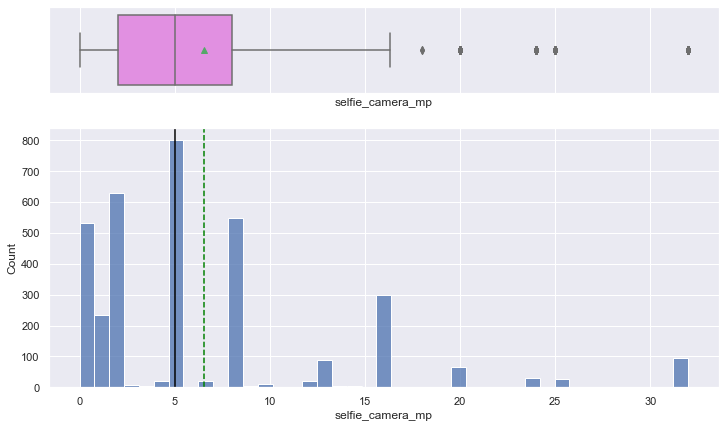

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "selfie_camera_mp")

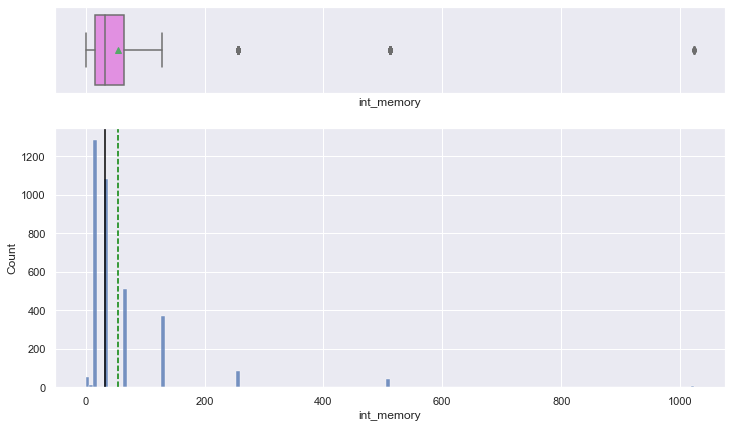

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "int_memory")

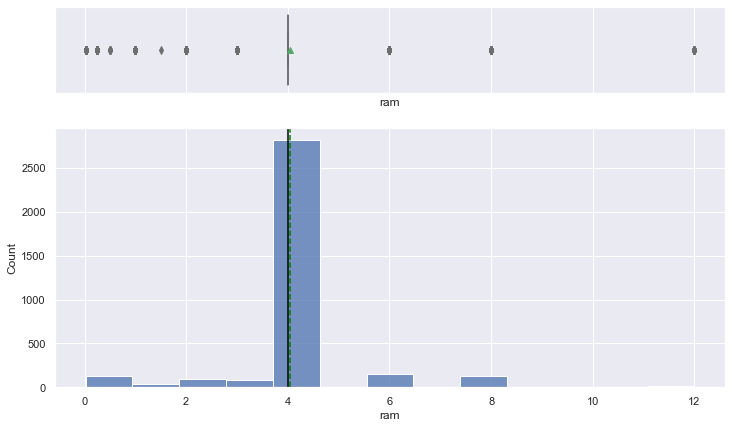

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "ram")

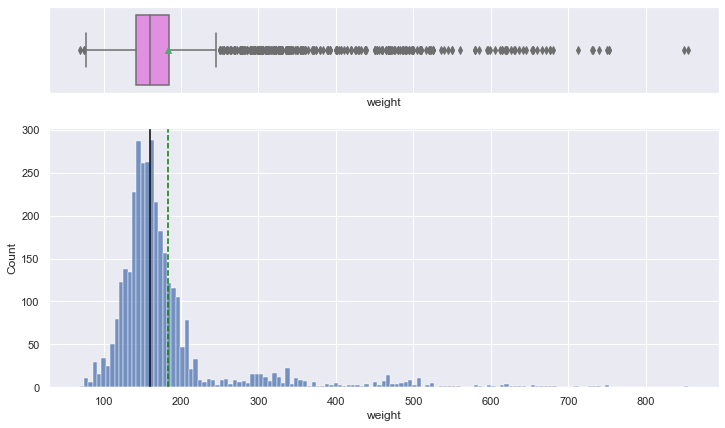

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "weight")

In [19]:
# let's apply the log transform to see if we can make the distribution of weight closer to normal
df["weight_log"] = np.log(df["weight"])

<IPython.core.display.Javascript object>

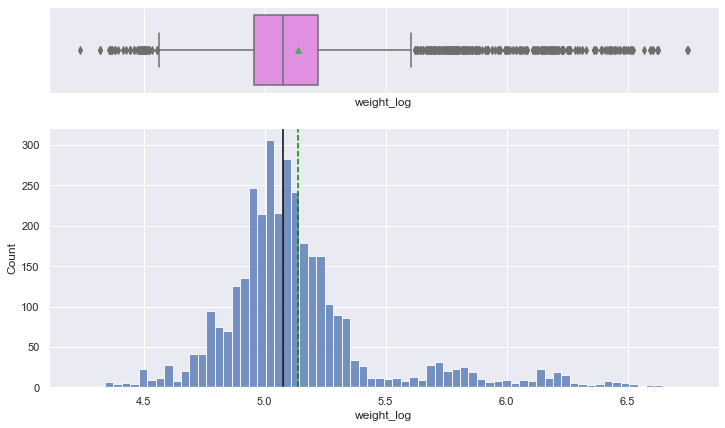

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "weight_log")

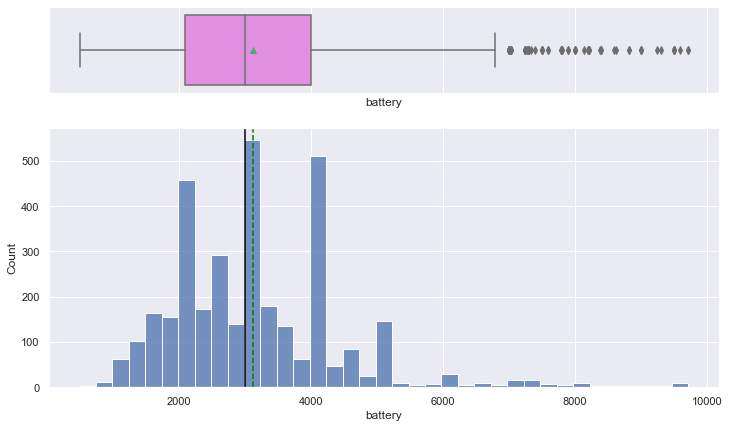

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "battery")

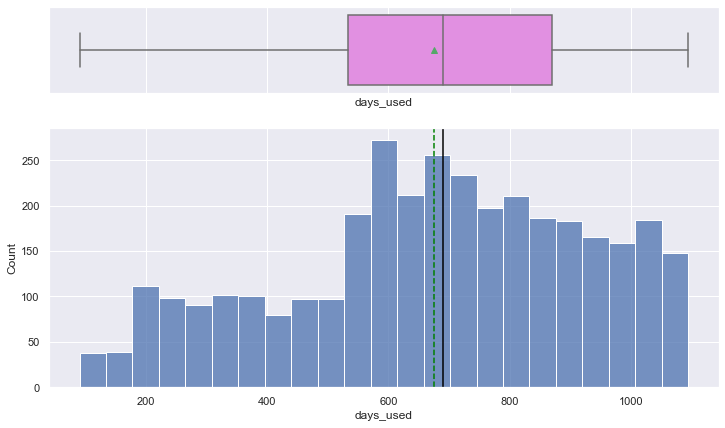

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "days_used")

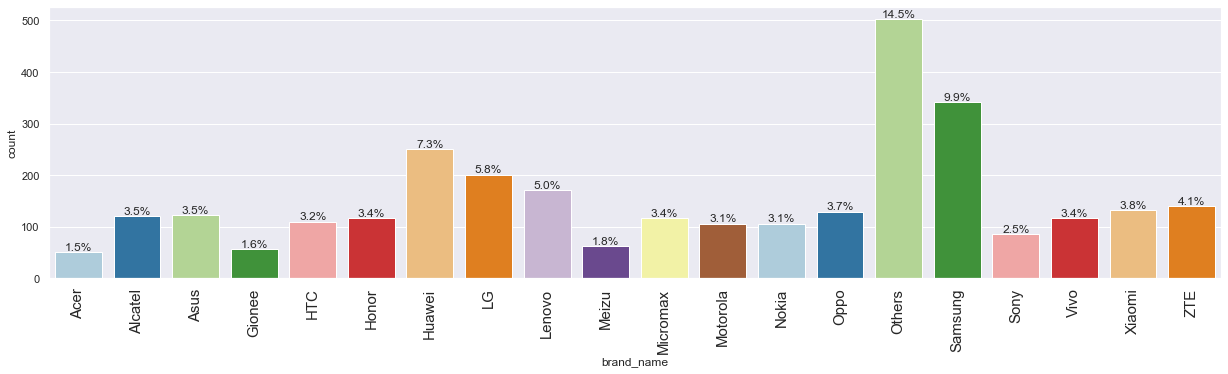

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "brand_name", perc=True, n=20)

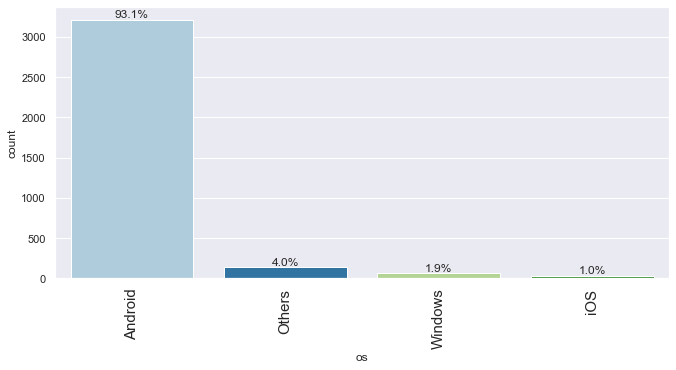

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df, "os", perc=True, n=10)

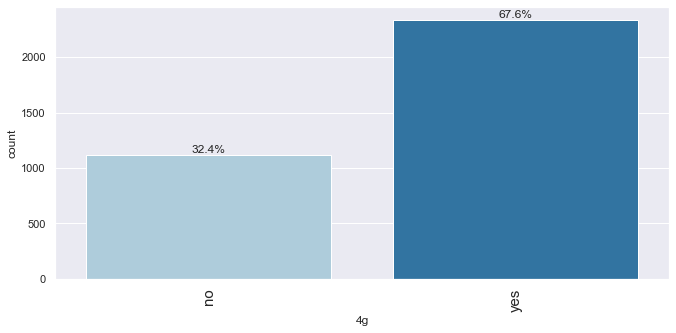

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(df, "4g", perc=True, n=10)

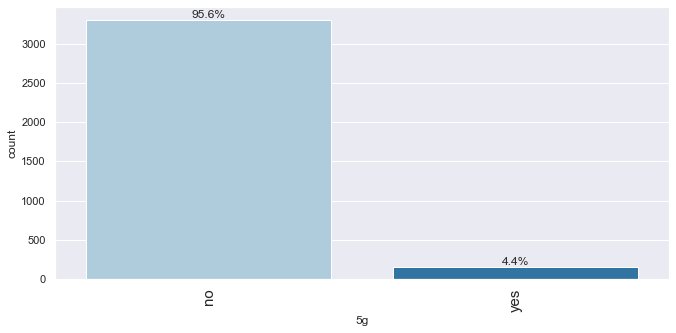

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "5g", perc=True, n=10)

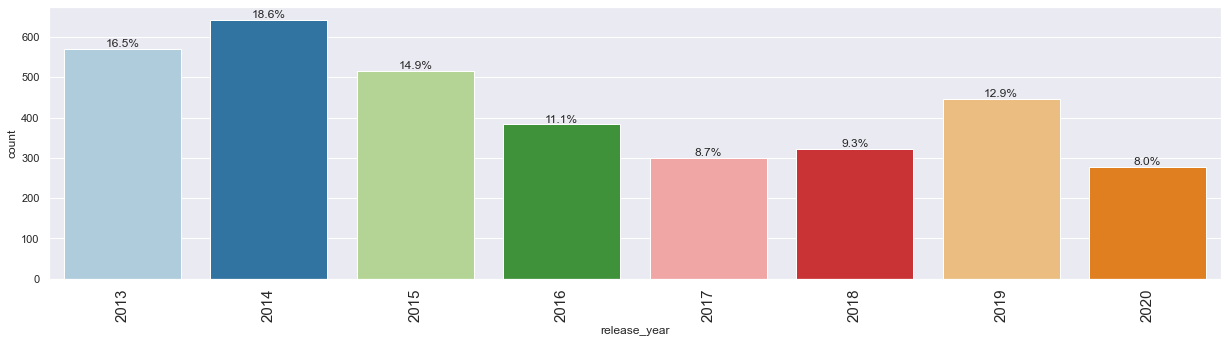

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "release_year", perc=True, n=20)

## Bivariate Analysis

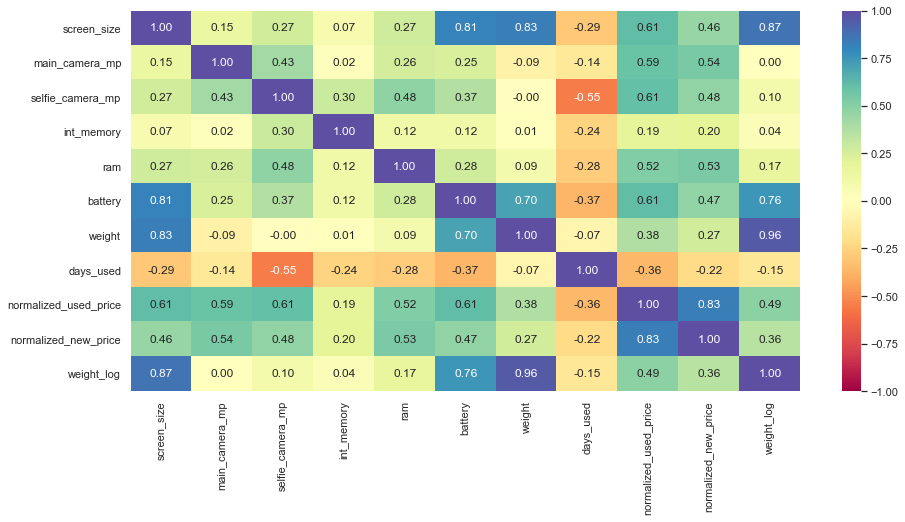

<IPython.core.display.Javascript object>

In [31]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

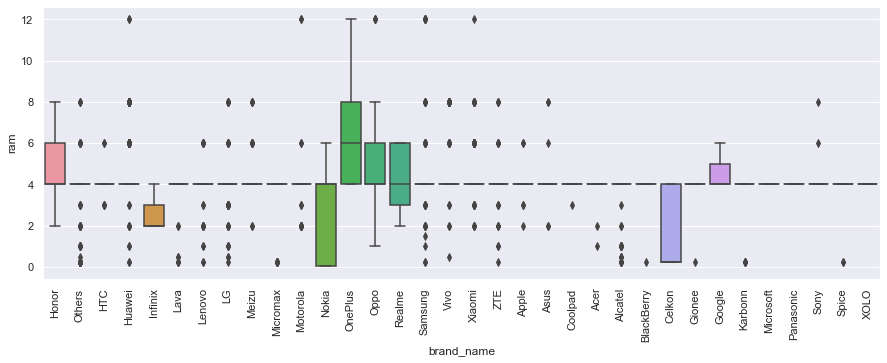

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

In [33]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 16)

<IPython.core.display.Javascript object>

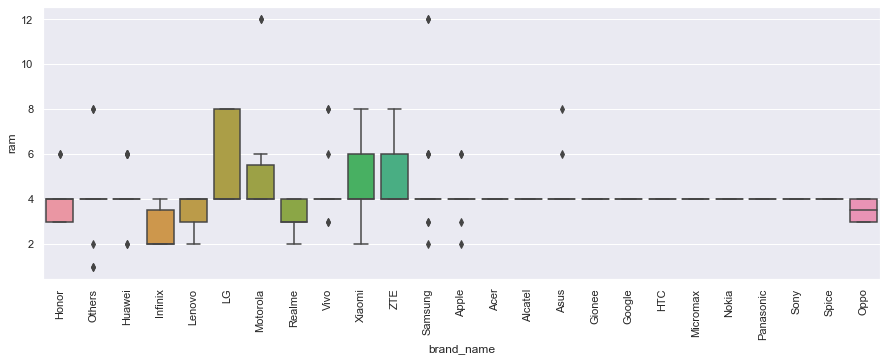

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

In [35]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 16)

<IPython.core.display.Javascript object>

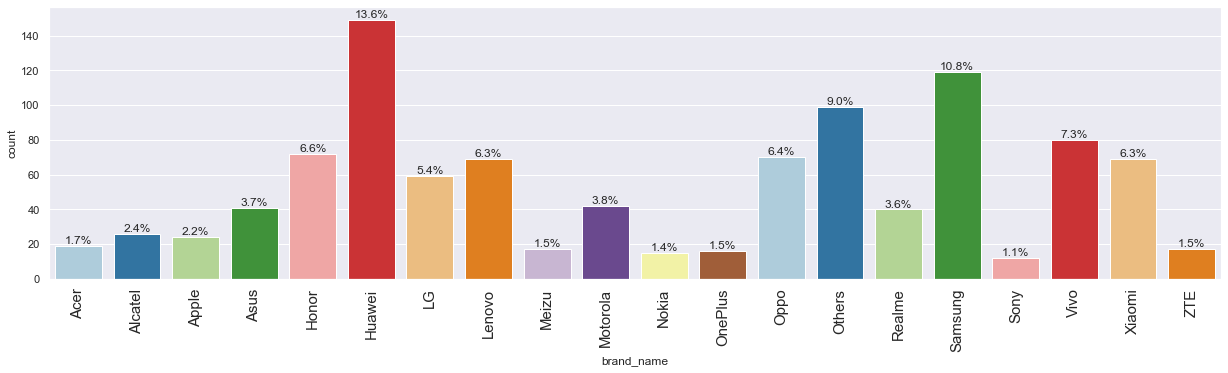

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df_large_screen, "brand_name", perc=True, n=20)

In [37]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 16)

<IPython.core.display.Javascript object>

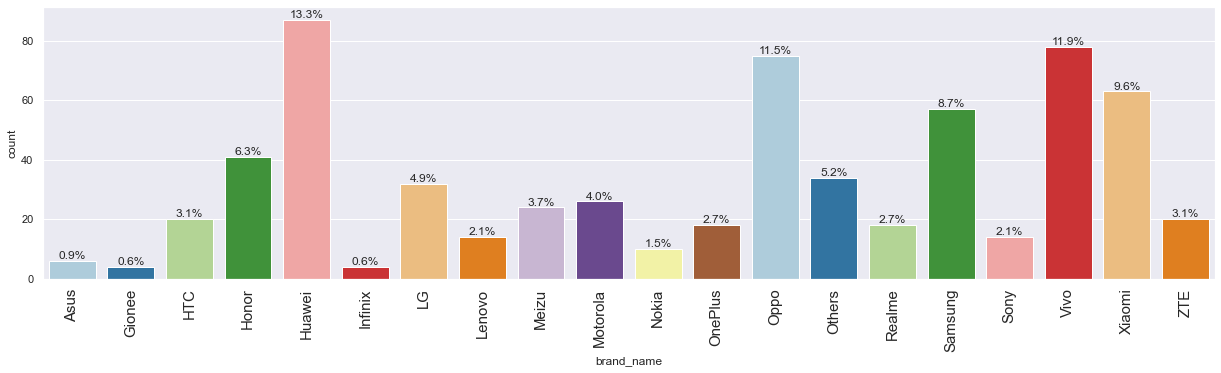

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df_selfie_camera, "brand_name", perc=True, n=20)

In [39]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 16)

<IPython.core.display.Javascript object>

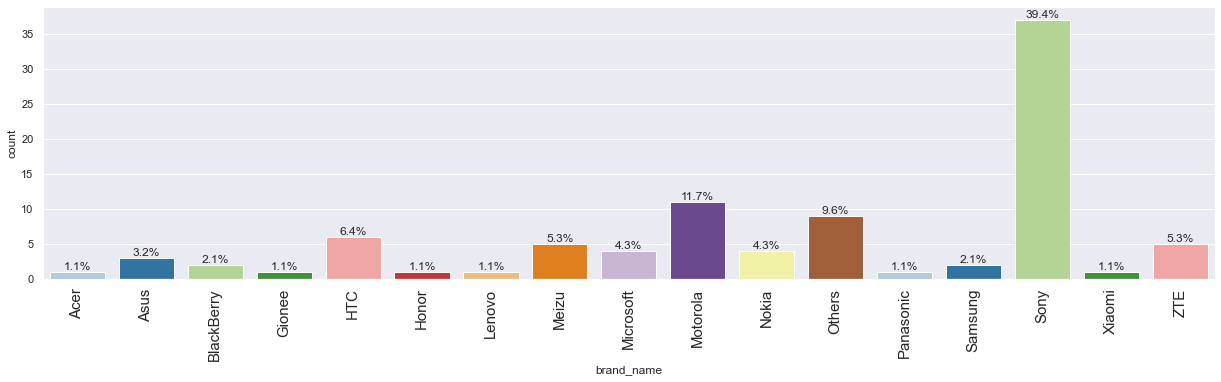

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df_main_camera, "brand_name", perc=True, n=20)

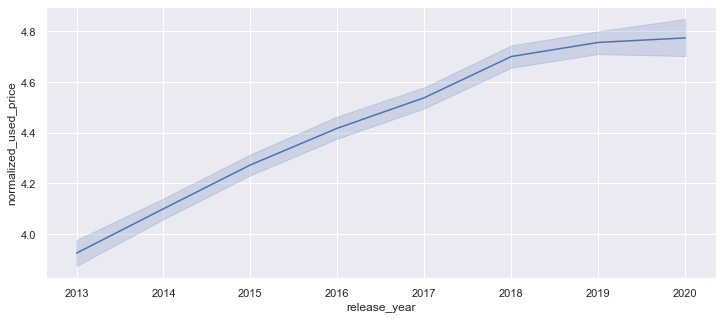

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=data, x="release_year", y="normalized_used_price"
)  ## Complete the code to create a lineplot for release year and used price
plt.show()

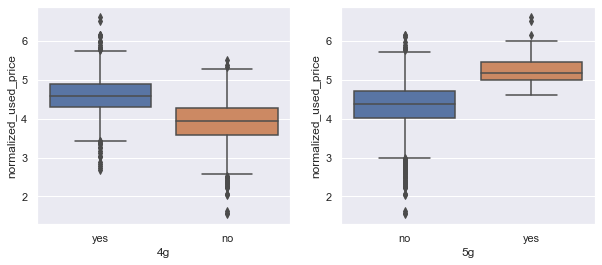

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

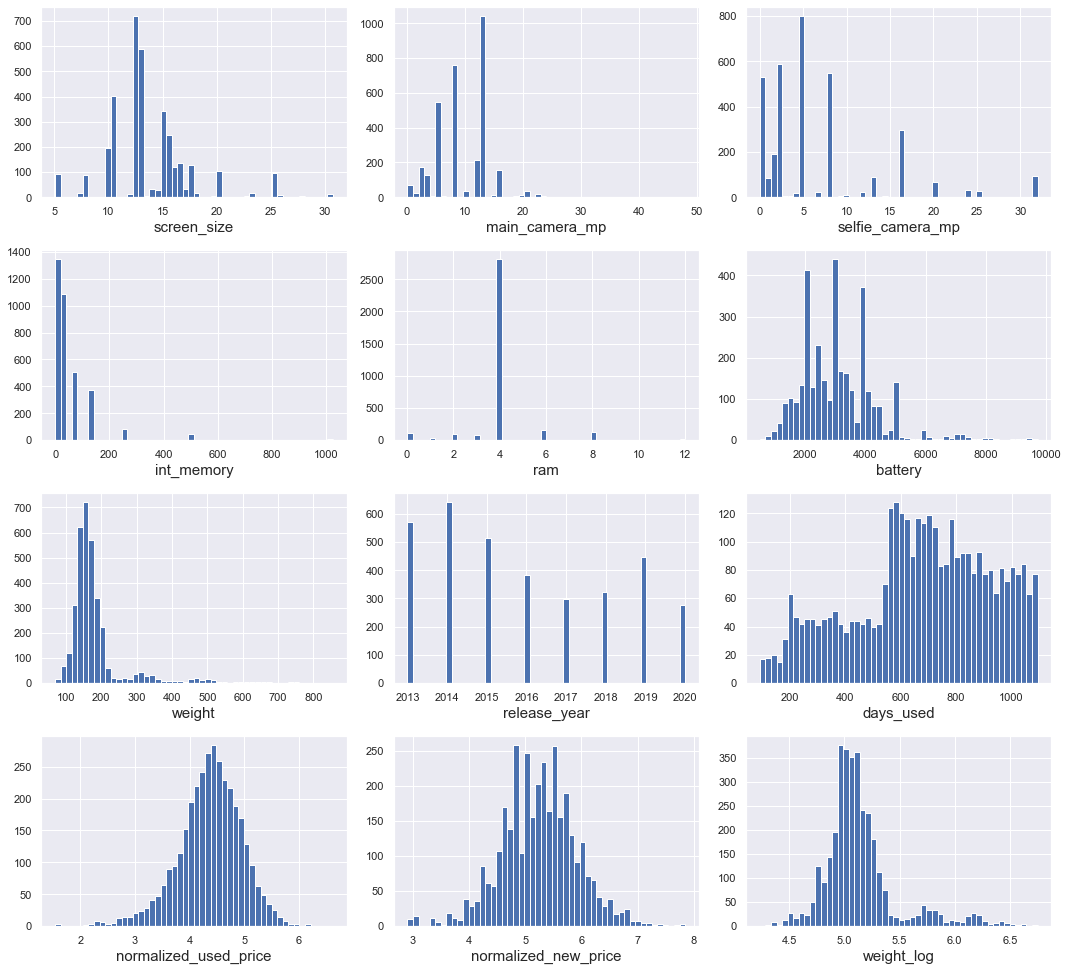

<IPython.core.display.Javascript object>

In [43]:
# creating a list of non-tag columns
dist_cols = [
    item for item in df.select_dtypes(include=np.number).columns if "tag" not in item
]


# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 30))

for i in range(len(dist_cols)):
    plt.subplot(9, 3, i + 1)
    plt.hist(df[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(dist_cols[i], fontsize=15)

plt.show()

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [44]:
# let's create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [45]:
# checking the column names and datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
 15  weig

<IPython.core.display.Javascript object>

In [46]:
# function to convert the variables with object datatypes to categorical
def obj_cat_conv(series):
    return series.astype("category")

<IPython.core.display.Javascript object>

In [47]:
# converting the variables with object datatypes to categorical
cols_to_convert = ["brand_name", "os", "4g", "5g"]
df1[cols_to_convert] = df1[cols_to_convert].apply(obj_cat_conv)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   category
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3275 non-null   float64 
 6   selfie_camera_mp       3452 non-null   float64 
 7   int_memory             3450 non-null   float64 
 8   ram                    3450 non-null   float64 
 9   battery                3448 non-null   float64 
 10  weight                 3447 non-null   float64 
 11  release_year           3454 non-null   int64   
 12  days_used              3454 non-null   int64   
 13  normalized_used_price  3454 non-null   float64 
 14  normalized_new_price   3454 non-null   f

<IPython.core.display.Javascript object>

In [48]:
# checking for missing values in the data
print(f"\nNull values in each feature/variable:\n{df1.isnull().sum()}")


Null values in each feature/variable:
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
weight_log                 7
dtype: int64


<IPython.core.display.Javascript object>

In [54]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
    "weight_log",
]

for col in cols_impute:
    df1[col] = df1.groupby(["release_year", "brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )  ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name

<IPython.core.display.Javascript object>

In [55]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
    "weight_log",
]

for col in cols_impute:
    df1[col] = df1.groupby(["brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )  ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name

<IPython.core.display.Javascript object>

In [56]:
# checking for missing values in the data
print(f"\nNull values in each feature/variable:\n{df1.isnull().sum()}")


Null values in each feature/variable:
brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               0
dtype: int64


<IPython.core.display.Javascript object>

In [57]:
# function to convert the variables with object datatypes to categorical
def imputation(series):
    return series.fillna(series.median(), axis=0)

<IPython.core.display.Javascript object>

In [58]:
cols_to_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
    "weight_log",
]
df1[cols_to_impute] = df1[cols_to_impute].apply(imputation)
df1.info()
print(f"\nNull values in each feature/variable:\n{df1.isnull().sum()}")
print(f"\nNot Available values in each feature/variable:\n{df1.isna().sum()}")
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   category
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3454 non-null   float64 
 6   selfie_camera_mp       3454 non-null   float64 
 7   int_memory             3454 non-null   float64 
 8   ram                    3454 non-null   float64 
 9   battery                3454 non-null   float64 
 10  weight                 3454 non-null   float64 
 11  release_year           3454 non-null   int64   
 12  days_used              3454 non-null   int64   
 13  normalized_used_price  3454 non-null   float64 
 14  normalized_new_price   3454 non-null   f

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356


<IPython.core.display.Javascript object>

In [59]:
# re-applying the log-transform to the weight column
df1["weight_log"] = np.log(df1["weight"])

# checking for missing values
df1.isnull().sum()  ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               0
dtype: int64

<IPython.core.display.Javascript object>

##Feature Engineering

In [60]:
# checking the column names and datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   category
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3454 non-null   float64 
 6   selfie_camera_mp       3454 non-null   float64 
 7   int_memory             3454 non-null   float64 
 8   ram                    3454 non-null   float64 
 9   battery                3454 non-null   float64 
 10  weight                 3454 non-null   float64 
 11  release_year           3454 non-null   int64   
 12  days_used              3454 non-null   int64   
 13  normalized_used_price  3454 non-null   float64 
 14  normalized_new_price   3454 non-null   f

<IPython.core.display.Javascript object>

In [61]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

<IPython.core.display.Javascript object>

In [62]:
# checking the column names and datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   category
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3454 non-null   float64 
 6   selfie_camera_mp       3454 non-null   float64 
 7   int_memory             3454 non-null   float64 
 8   ram                    3454 non-null   float64 
 9   battery                3454 non-null   float64 
 10  weight                 3454 non-null   float64 
 11  days_used              3454 non-null   int64   
 12  normalized_used_price  3454 non-null   float64 
 13  normalized_new_price   3454 non-null   float64 
 14  weight_log             3454 non-null   f

<IPython.core.display.Javascript object>

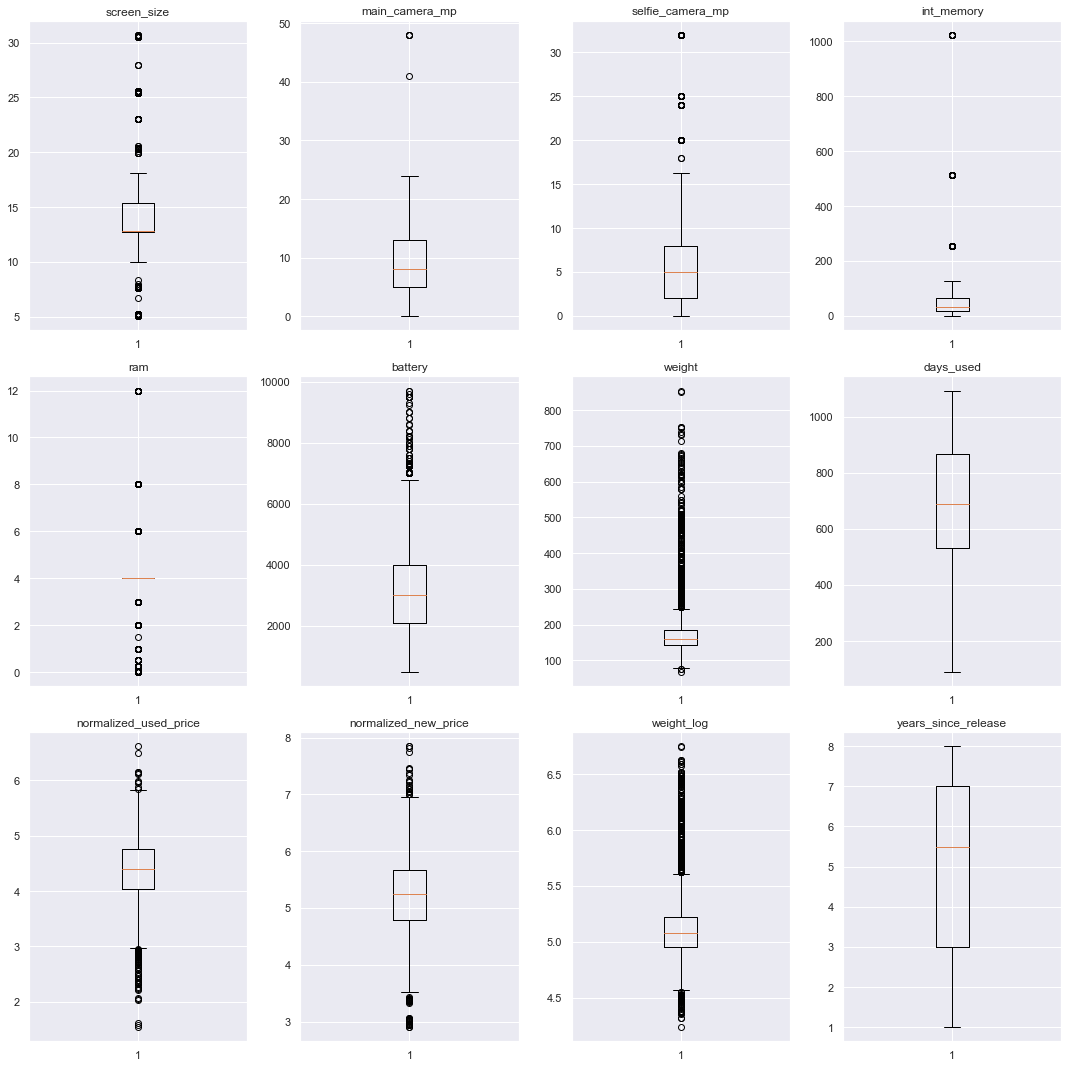

<IPython.core.display.Javascript object>

In [63]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [64]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [67]:
treat_out_cols = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "battery",
    "weight",
    "weight_log",
    "ram",
    "normalized_used_price",
    "normalized_new_price",
]

df2 = treat_outliers_all(df1, treat_out_cols)

<IPython.core.display.Javascript object>

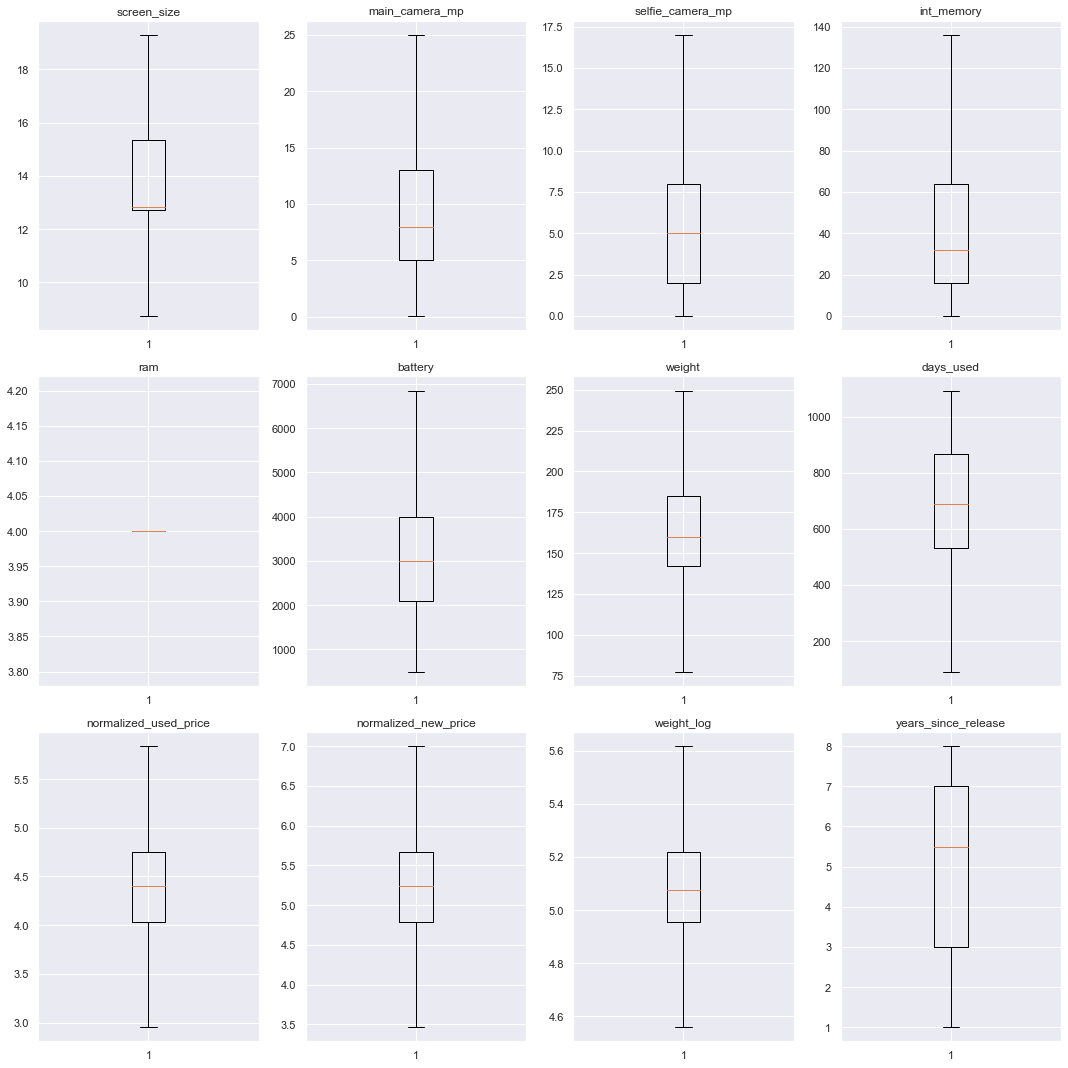

<IPython.core.display.Javascript object>

In [68]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [69]:
# let's check the statistical summary of the data once
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.586329,4.572418,0.08,5.0,8.0,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.694079,39.079988,0.01,16.0,32.0,64.0,136.0
ram,3454.0,NaN,NaN,NaN,4.0,0.0,4.0,4.0,4.0,4.0,4.0
battery,3454.0,NaN,NaN,NaN,3109.100898,1212.793754,500.0,2100.0,3000.0,4000.0,6850.0


<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Building a Linear Regression model

In [95]:
X = df2.drop(
    ["normalized_used_price", "brand_name", "ram"], axis=1
)  # ram and 'brand_name' are dropped
y = df2["normalized_used_price"]

<IPython.core.display.Javascript object>

In [96]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [97]:
X = pd.get_dummies(
    X, columns=X.select_dtypes(include=["category"]).columns.tolist(), drop_first=True
)

<IPython.core.display.Javascript object>

In [98]:
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_new_price,weight_log,years_since_release,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3020.0,146.0,127,4.715100,4.983607,1,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,4300.0,213.0,325,5.519018,5.361292,1,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,4200.0,213.0,162,5.884631,5.361292,1,0,0,0,1,1
3,1.0,19.30,13.0,8.0,64.0,6850.0,249.5,345,5.630961,5.617149,1,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,5000.0,185.0,293,4.947837,5.220356,1,0,0,0,1,0


<IPython.core.display.Javascript object>

In [99]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [100]:
x_train.shape[0], x_test.shape[0]

(2417, 1037)

<IPython.core.display.Javascript object>

In [101]:
y_train.shape[0], y_test.shape[0]

(2417, 1037)

<IPython.core.display.Javascript object>

In [102]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     852.4
Date:                   Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                           20:03:44   Log-Likelihood:                 206.43
No. Observations:                   2417   AIC:                            -380.9
Df Residuals:                       2401   BIC:                            -288.2
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [103]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [104]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.222163,0.175932,0.841902,0.840848,4.133354


<IPython.core.display.Javascript object>

In [105]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.225859,0.179262,0.844264,0.841821,4.219124


<IPython.core.display.Javascript object>

## Model performance evaluation

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [107]:
checking_vif(x_train)

,feature,VIF
0,const,47767.166544
1,screen_size,5.029457
2,main_camera_mp,2.207557
3,selfie_camera_mp,3.533430
4,int_memory,2.148368
5,battery,3.537056
6,weight,181.302458
7,days_used,2.579259
8,normalized_new_price,2.642293
9,weight_log,179.489759


<IPython.core.display.Javascript object>

In [108]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [109]:
col_list = ["screen_size", "weight", "weight_log", "years_since_release"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.840894,0.222917
1,weight_log,0.840095,0.223476
2,weight,0.837346,0.225388
3,screen_size,0.833309,0.228168


<IPython.core.display.Javascript object>

In [110]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,47741.204197
1,main_camera_mp,2.206448
2,selfie_camera_mp,3.519771
3,int_memory,2.146823
4,battery,3.191890
5,weight,180.748489
6,days_used,2.571467
7,normalized_new_price,2.634493
8,weight_log,179.176365
9,years_since_release,4.987562


<IPython.core.display.Javascript object>

In [111]:
col_list = ["weight", "weight_log", "years_since_release"]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.832973,0.228398
1,weight_log,0.832260,0.228885
2,weight,0.813000,0.241668


<IPython.core.display.Javascript object>

In [112]:
col_to_drop = "weight_log"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight_log


,feature,VIF
0,const,112.262894
1,main_camera_mp,2.145344
2,selfie_camera_mp,3.519001
3,int_memory,2.146781
4,battery,3.189685
5,weight,2.645752
6,days_used,2.571467
7,normalized_new_price,2.628682
8,years_since_release,4.987550
9,os_Others,1.206334


<IPython.core.display.Javascript object>

In [113]:
olsmod1 = sm.OLS(y_train, x_train3).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     923.1
Date:                   Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                           20:06:46   Log-Likelihood:                 141.40
No. Observations:                   2417   AIC:                            -254.8
Df Residuals:                       2403   BIC:                            -173.7
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [114]:
# initial list of columns
cols = x_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        print(f"Feature {feature_with_p_max} removed")
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

Feature 5g_yes removed
Feature os_iOS removed
Feature os_Others removed
Feature days_used removed
Feature os_Windows removed
Feature 4g_yes removed
['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'battery', 'weight', 'normalized_new_price', 'years_since_release']


<IPython.core.display.Javascript object>

In [115]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

<IPython.core.display.Javascript object>

In [116]:
olsmod2 = sm.OLS(y_train, x_train4).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     1712.
Date:                   Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                           20:07:30   Log-Likelihood:                 137.38
No. Observations:                   2417   AIC:                            -258.8
Df Residuals:                       2409   BIC:                            -212.4
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [119]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf2 = model_performance_regression(olsmod2, x_train4, y_train)
olsmodel_train_perf2

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.228601,0.180618,0.832606,0.83205,4.250824


<IPython.core.display.Javascript object>

In [120]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf2 = model_performance_regression(olsmod2, x_test4, y_test)
olsmodel_test_perf2

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233516,0.185362,0.833524,0.832229,4.36549


<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [122]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.824441,0.263047
1525,4.448399,4.719909,-0.271510
1128,4.315353,4.340144,-0.024791
3003,4.282068,4.149404,0.132664
2907,4.456438,4.518576,-0.062138


<IPython.core.display.Javascript object>

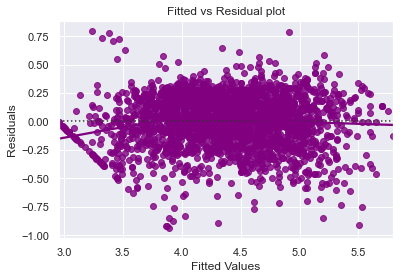

<IPython.core.display.Javascript object>

In [123]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

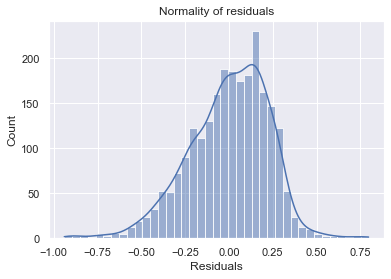

<IPython.core.display.Javascript object>

In [124]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

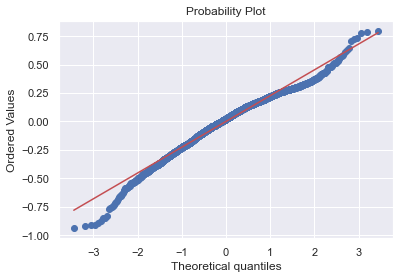

<IPython.core.display.Javascript object>

In [125]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [127]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 1.1193988694583972), ('p-value', 0.02540283775350062)]

<IPython.core.display.Javascript object>

In [128]:
# predictions on the test set
pred = olsmod2.predict(x_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.397647
2341,3.696103,4.020120
1913,3.592093,3.663569
688,4.306495,4.087560
650,4.522115,5.156280
2291,4.259294,4.372639
40,4.997685,5.305068
1884,3.875359,4.075990
2538,4.206631,4.001983
45,5.380450,5.351768


<IPython.core.display.Javascript object>

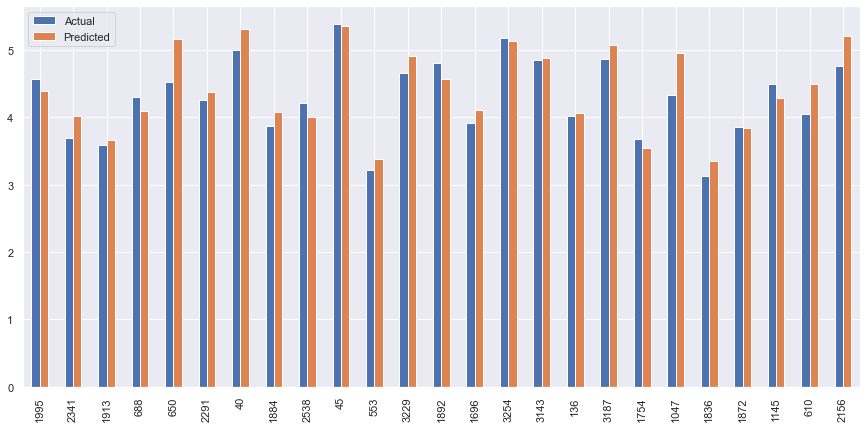

<IPython.core.display.Javascript object>

In [129]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

## Final Model Summary

In [131]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.228601,0.180618,0.832606,0.83205,4.250824


<IPython.core.display.Javascript object>

In [132]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233516,0.185362,0.833524,0.832229,4.36549


<IPython.core.display.Javascript object>

In [133]:
# training performance comparison

models_train_comp_df = pd.concat([olsmodel_train_perf.T, olsmod2_train_perf.T], axis=1,)

models_train_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,0.222163,0.228601
MAE,0.175932,0.180618
R-squared,0.841902,0.832606
Adj. R-squared,0.840848,0.832050
MAPE,4.133354,4.250824


<IPython.core.display.Javascript object>

In [134]:
# test performance comparison

models_test_comp_df = pd.concat([olsmodel_test_perf.T, olsmod2_test_perf.T], axis=1,)

models_test_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,0.225859,0.233516
MAE,0.179262,0.185362
R-squared,0.844264,0.833524
Adj. R-squared,0.841821,0.832229
MAPE,4.219124,4.365490


<IPython.core.display.Javascript object>

In [135]:
olsmodel_final = sm.OLS(y_train, x_train4).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     1712.
Date:                   Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                           20:15:57   Log-Likelihood:                 137.38
No. Observations:                   2417   AIC:                            -258.8
Df Residuals:                       2409   BIC:                            -212.4
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations

- year since release (age of the device) is most dominant factor in determining the normalized used price
- The factors like main_camera_mp, selphie_camera_mp, normalized_new_price, release_year, screen size, 4G, are positive coefficients and helping to increases the normalized used_price.
- The Linear regression model is able to explain 83.3% of the variance. 
- The special emphasis should be on promotions for recently released and lightly used devices (maybe by offering warranty plans and insurance) because they fetch a higher used device price as per the visualizations and the model findings